In [1]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from PIL import Image
import json
import sys
import os
from os import walk
from collections import defaultdict
path = './output_slurm/'
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [62]:

# for (dirpath, dirnames, filenames) in walk(mypath):

def find(A, x):
    out = filter(lambda y: x in y, A)
    if len(out)>0: return out[0]
    return [];
def getVal(xStr, token=":"):
    a = xStr.split(token);
    b = a[1]
    if '\n' in b:
        spl = b.split("\n");
        return float(spl[0]);
    return float(b);
def get_size_param(x):
    x = x.replace('\n','')
    x = x.split("(")[-1].split(")")[0];
    y = x.split(",")
    a = find(y, 'hidden_size');
    b = find(y, 'num_layer');
    c = find(y, 'embed_size')
    hidden_size = int(getVal(a,token='='))
    num_layer = int(getVal(b,token='='))
    embed_size = int(getVal(c,token='='))
    return hidden_size, embed_size, num_layer
def get_lr_param(x):
    x = x.replace('\n','')
    x = x.split("(")[-1].split(")")[0];
    y = x.split(",")
    a = find(y, 'learning_rate');
    lr = getVal(a,token='=')
    return lr
def plot(log, color_by=0):   
    #     for fn in filenames:
    idx2Arg2Loss = defaultdict(dict);
    i = 0;
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    pltlog = []
    with (open(log, 'r')) as handle:
        for line in handle:
    #         print line
            if ('Namespace' in line):
                #first line
                i+=1;
                idx2Arg2Loss[i] = {'arg':'','loss':[],'time':[]};
            if ('embed_size' in line) or ('hidden_size' in line) or ('num_layer' in line):
                idx2Arg2Loss[i]['arg'] += line
            elif ('Epoch' in line):
                spl = line.split(",");
                lossStr = find(spl, 'Loss');
                timeStr = find(spl, 'Time');
                loss = getVal(lossStr)
                time = getVal(timeStr)
                idx2Arg2Loss[i]['loss'].append(loss);
                idx2Arg2Loss[i]['time'].append(time);

        for k, v in idx2Arg2Loss.iteritems():
            a,b,c = get_size_param(v['arg'])
#             print a,b,c
            pltlog.append('%d-%d-%d'%(a,b,c));
#             print 'TIME: ', v['time'][-1]
#             print '----------'
            if color_by==0:
                plt.plot(v['loss']);
            elif color_by==1:
                if (a==128): plt.plot(v['loss'], color='blue')
                if (a==256): plt.plot(v['loss'], color='red')
                if (a==512): plt.plot(v['loss'], color='green')
            elif color_by==2:
                if (b==64): plt.plot(v['loss'], color='blue')
                if (b==128): plt.plot(v['loss'], color='red')
                if (b==256): plt.plot(v['loss'], color='green')
            if color_by==3:
                if (c==1): plt.plot(v['loss'], color='blue')
                if (c==2): plt.plot(v['loss'], color='red')
                if (c==3): plt.plot(v['loss'], color='green')
        plt.legend(pltlog, loc='upper left')
        plt.show()

            

./output_slurm/1-2_layer_lstm.txt
256 128 2
TIME:  1031.5019
----------
512 128 2
TIME:  1078.044
----------
128 256 2
TIME:  1022.6309
----------
256 256 2
TIME:  1030.5669
----------
512 256 2
TIME:  1060.3482
----------
128 64 3
TIME:  1154.4829
----------
256 64 3
TIME:  1144.0804
----------
512 64 3
TIME:  1238.71
----------
128 128 3
TIME:  1168.4159
----------
256 128 3
TIME:  1197.9457
----------
512 128 3
TIME:  1258.4666
----------
128 256 3
TIME:  1185.4392
----------
256 256 3
TIME:  1143.2655
----------
512 256 3
TIME:  1360.1209
----------


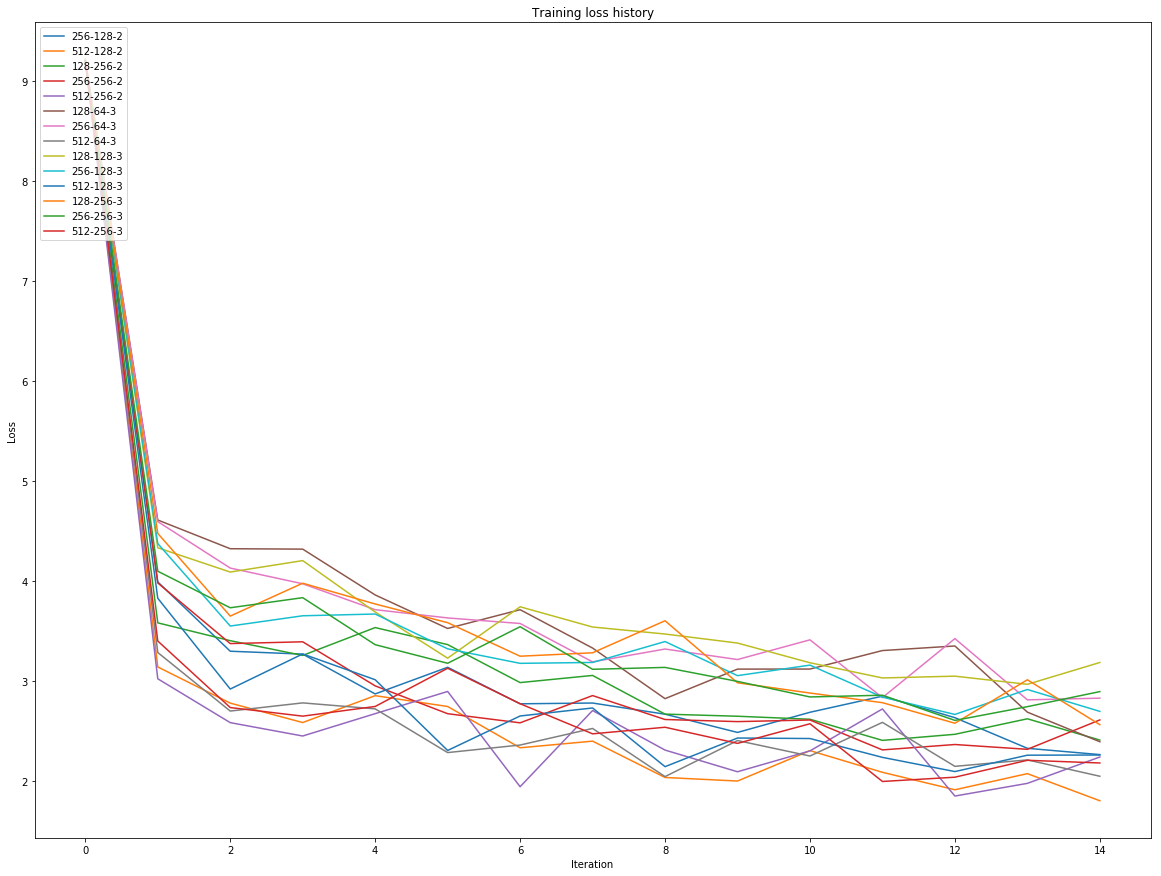

In [55]:
mypath = path + 'size_lstm.txt'
print mypath
plot(mypath)

./output_slurm/size_gru.txt


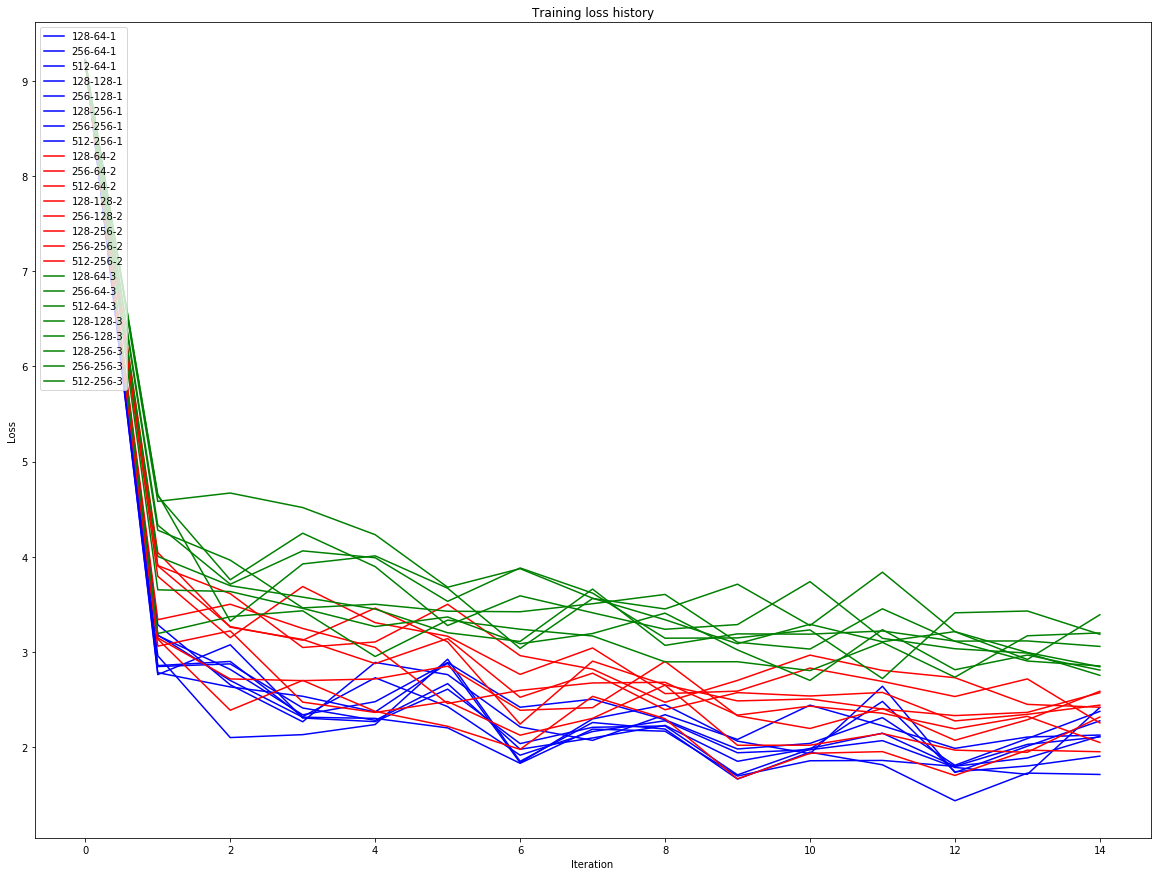

In [68]:
mypath = path + 'size_gru.txt'
print mypath
plot(mypath, color_by=3)

In [43]:
def plot_lr(log):   
    #     for fn in filenames:
    idx2Arg2Loss = defaultdict(dict);
    i = 0;
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    pltlog = []
    with (open(log, 'r')) as handle:
        for line in handle:
    #         print line
            if ('Namespace' in line):
                #first line
                i+=1;
                idx2Arg2Loss[i] = {'arg':'','loss':[],'time':[]};
            if ('embed_size' in line) or ('hidden_size' in line) or ('num_layer' in line):
                idx2Arg2Loss[i]['arg'] += line
            elif ('Epoch' in line):
                spl = line.split(",");
                lossStr = find(spl, 'Loss');
                timeStr = find(spl, 'Time');
                loss = getVal(lossStr)
                time = getVal(timeStr)
                idx2Arg2Loss[i]['loss'].append(loss);
                idx2Arg2Loss[i]['time'].append(time);

        for k, v in idx2Arg2Loss.iteritems():
#             a,b,c = get_size_param(v['arg'])
#             print a,b,c
            print v['arg']
            lr = get_lr_param(v['arg'])
            print str(lr)
            pltlog.append('%s'%(str(lr)));
            if k == 6: continue;
            print 'TIME: ', v['time'][-1]
            print '----------'
            plt.plot(v['loss'])
        plt.legend(pltlog, loc='upper left')
        plt.show()


In [64]:
mypath = path + 'lr_lstm.txt'
print mypath
plot_lr(mypath)

./output_slurm/lr_lstm.txt


TypeError: plot_lr() got an unexpected keyword argument 'color_by'

./output_slurm/lr_gru.txt
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=128, hidden_size=256, image_dir='./data/resized2014', learning_rate=1e-05, log_step=500, model_path='./models/GRU_LR', num_epochs=5, num_layers=1, num_workers=2, save_step=500, vocab_path='./data/vocab.pkl')

1e-05
TIME:  1018.7187
----------
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=128, hidden_size=256, image_dir='./data/resized2014', learning_rate=0.0001, log_step=500, model_path='./models/GRU_LR', num_epochs=5, num_layers=1, num_workers=2, save_step=500, vocab_path='./data/vocab.pkl')

0.0001
TIME:  1044.7878
----------
Namespace(batch_size=25, caption_path='./coco/annotations/sm_captions_train2014.json', crop_size=224, embed_size=128, hidden_size=256, image_dir='./data/resized2014', learning_rate=0.001, log_step=500, model_path='./models/GRU_LR', num_epochs=5, num_layers=1, 

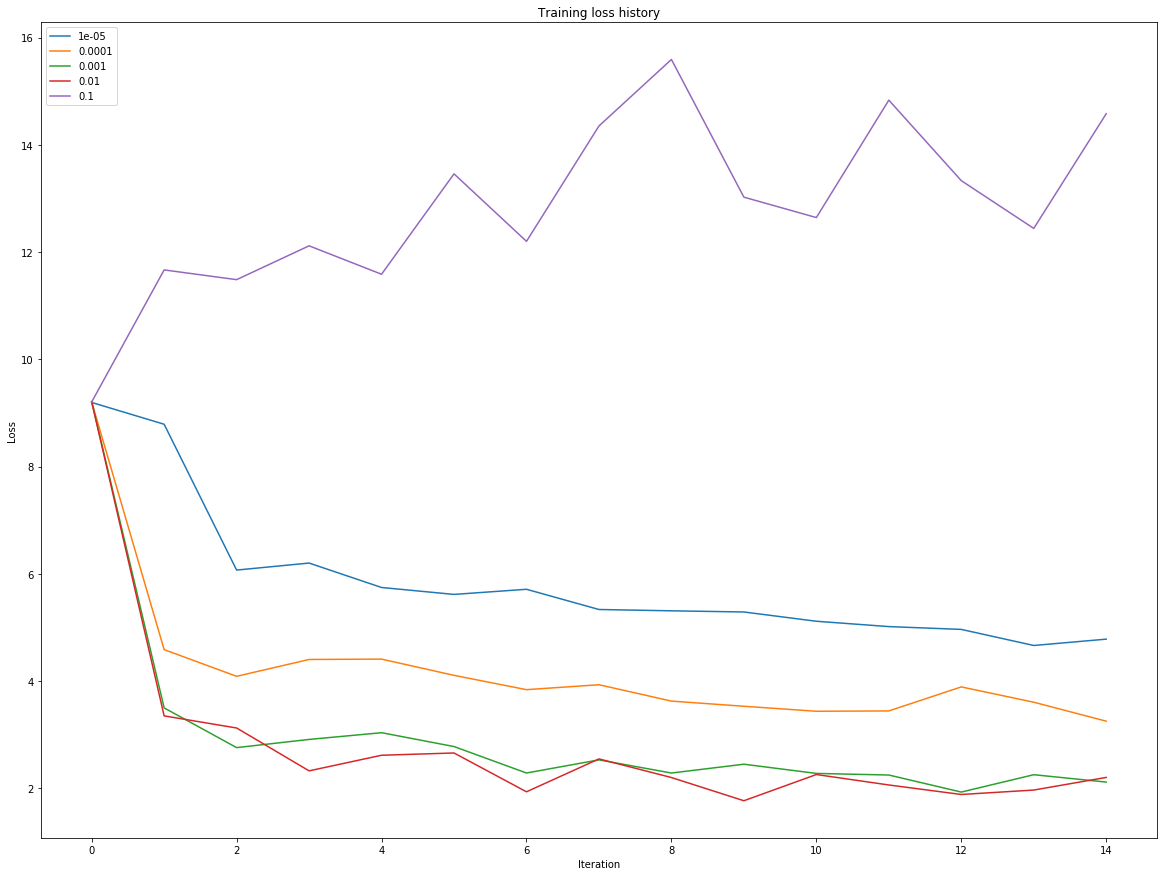

In [53]:
def plot_gru_lr(log):   
    #     for fn in filenames:
    idx2Arg2Loss = defaultdict(dict);
    i = 0;
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    pltlog = []
    with (open(log, 'r')) as handle:
        for line in handle:
    #         print line
            if ('Namespace' in line):
                #first line
                i+=1;
                idx2Arg2Loss[i] = {'arg':'','loss':[],'time':[]};
            if ('embed_size' in line) or ('hidden_size' in line) or ('num_layer' in line):
                idx2Arg2Loss[i]['arg'] += line
            elif ('Epoch' in line):
                spl = line.split(",");
                lossStr = find(spl, 'Loss');
                timeStr = find(spl, 'Time');
                loss = getVal(lossStr)
                time = getVal(timeStr)
                idx2Arg2Loss[i]['loss'].append(loss);
                idx2Arg2Loss[i]['time'].append(time);

        for k, v in idx2Arg2Loss.iteritems():
#             a,b,c = get_size_param(v['arg'])
#             print a,b,c
            if k == 6: continue;
            print v['arg']
            lr = get_lr_param(v['arg'])
            print str(lr)
            pltlog.append('%s'%(str(lr)));
            print 'TIME: ', v['time'][-1]
            print '----------'

            plt.plot(v['loss'])
        plt.legend(pltlog, loc='upper left')
        plt.show()
mypath = path + 'lr_gru.txt'
print mypath
plot_gru_lr(mypath)